In [1]:
# import libraries
from numpy import array

from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
# Loading the new dataset
import pandas as pd
file_path = "C:\Users\Itisha Sharma\Desktop\GitHub\Python_DL_MLP_CNN_RNN\Perrin Freres monthly champagne sales millions.csv"
df = pd.read_csv(file_path)
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [4]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   105 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


### Checking for trend and seasonality in the data

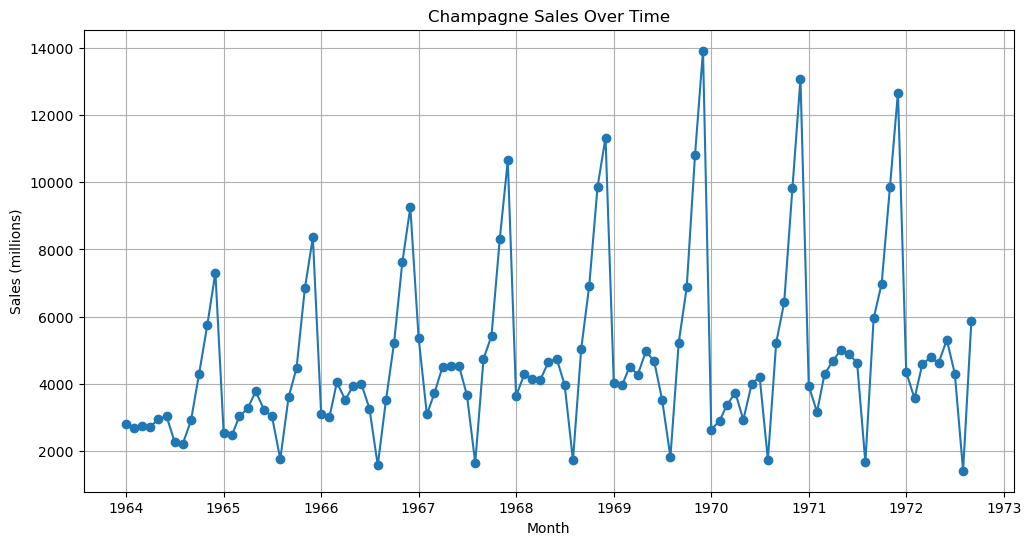

In [5]:
df['Month'] = pd.to_datetime(df['Month'])
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Perrin Freres monthly champagne sales millions ?64-?72'], marker='o', linestyle='-')
plt.title('Champagne Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales (millions)')
plt.grid(True)
plt.show()


The line chart suggests a potential upward trend in sales over historical data. Also, there is seasonality. The distinct seasonality patterns imply that the series is likely non-stationary. The seasonal pattern is repeat over the same period of time over the cycle. To understand this more in detail, we perform seasonal.decompose()

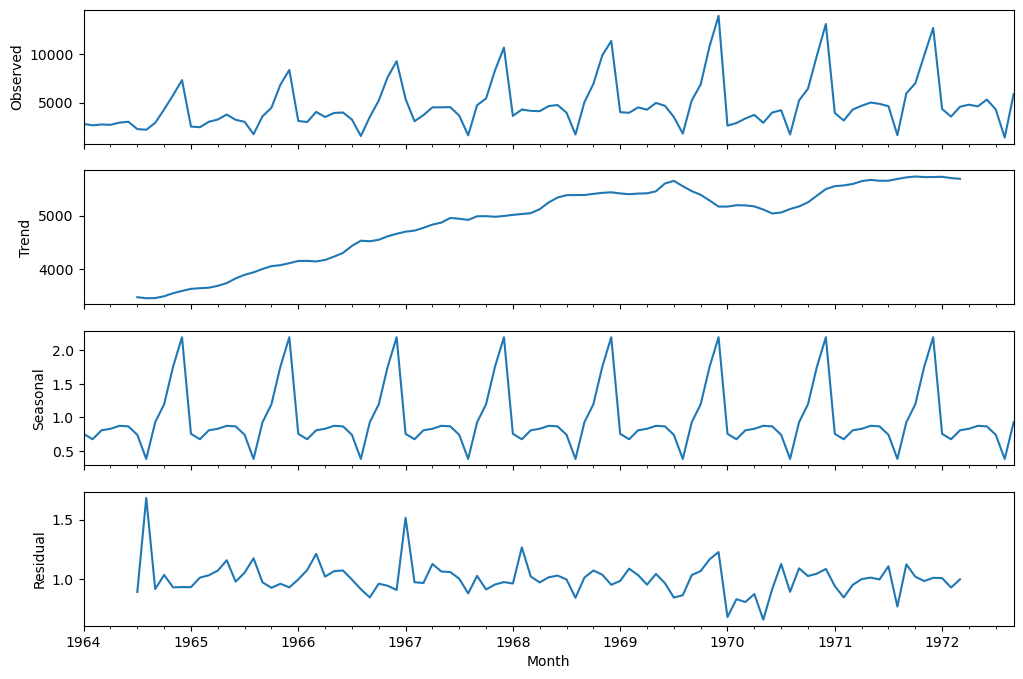

In [6]:
column_name = 'Perrin Freres monthly champagne sales millions ?64-?72'

# Set 'Month' column as the index
df.set_index('Month', inplace=True)

# Apply seasonal decomposition
result = seasonal_decompose(df[column_name], model='multiplicative')

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.xlabel('Month')
plt.show()


We can see the upward trend in the data the seasonality.

## Transform univariate time series to supervised learning problem

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
    

In [8]:
# define univariate time series

time_series_sequence = df[column_name].tolist()

# Number of time steps
n_steps = 3

# Transform to a supervised learning problem
X, y = split_sequence(time_series_sequence, n_steps)
print(X.shape, y.shape)

# show each sample
for i in range(len(X)):
    print(X[i], y[i])


(102, 3) (102,)
[2815. 2672. 2755.] 2721.0
[2672. 2755. 2721.] 2946.0
[2755. 2721. 2946.] 3036.0
[2721. 2946. 3036.] 2282.0
[2946. 3036. 2282.] 2212.0
[3036. 2282. 2212.] 2922.0
[2282. 2212. 2922.] 4301.0
[2212. 2922. 4301.] 5764.0
[2922. 4301. 5764.] 7312.0
[4301. 5764. 7312.] 2541.0
[5764. 7312. 2541.] 2475.0
[7312. 2541. 2475.] 3031.0
[2541. 2475. 3031.] 3266.0
[2475. 3031. 3266.] 3776.0
[3031. 3266. 3776.] 3230.0
[3266. 3776. 3230.] 3028.0
[3776. 3230. 3028.] 1759.0
[3230. 3028. 1759.] 3595.0
[3028. 1759. 3595.] 4474.0
[1759. 3595. 4474.] 6838.0
[3595. 4474. 6838.] 8357.0
[4474. 6838. 8357.] 3113.0
[6838. 8357. 3113.] 3006.0
[8357. 3113. 3006.] 4047.0
[3113. 3006. 4047.] 3523.0
[3006. 4047. 3523.] 3937.0
[4047. 3523. 3937.] 3986.0
[3523. 3937. 3986.] 3260.0
[3937. 3986. 3260.] 1573.0
[3986. 3260. 1573.] 3528.0
[3260. 1573. 3528.] 5211.0
[1573. 3528. 5211.] 7614.0
[3528. 5211. 7614.] 9254.0
[5211. 7614. 9254.] 5375.0
[7614. 9254. 5375.] 3088.0
[9254. 5375. 3088.] 3718.0
[5375. 3088.

In [9]:
# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

(102, 3, 1)


## Models

In [10]:
# MLP with an input layer

model_mlp = Sequential()
model_mlp.add(Dense(100, activation= 'relu' , input_dim=n_steps))
model_mlp.add(Dense(1))
model_mlp.summary()

# configure the model
model_mlp.compile(optimizer= 'adam' , loss= 'mse' )



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [11]:
# Training
# fit model
history_mlp = model_mlp.fit(X, y, epochs=1000, verbose=0)

In [12]:
#Model with 2 CNNs

# Create the model
model_cnn = Sequential()

# First CNN layer
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, 1)))
model_cnn.add(MaxPooling1D(pool_size=2, padding='same'))  # Change padding to "same"

# Second CNN layer with "same" padding
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'))
model_cnn.add(MaxPooling1D(pool_size=2, padding='same'))  # Change padding to "same"


# Flatten layer 
model_cnn.add(Flatten())

# Output layer
model_cnn.add(Dense(1))

# Display the model summary
model_cnn.summary()

# Compile the model
model_cnn.compile(optimizer='adam', loss='mse')

# Fit the model
model_cnn.fit(X, y, epochs=1000, verbose=0)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             8256      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)               

In [13]:
#Model with 1 layer of RNN

model_rnn = Sequential()

# RNN layer
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, 1)))

# Flatten layer 
model_rnn.add(Flatten())

# Output layer 
model_rnn.add(Dense(1))

# Explicitly build the model
model_rnn.build(input_shape=(None, n_steps, 1))

# Display the model summary
model_rnn.summary()

# Compile the model
model_rnn.compile(optimizer='adam', loss='mse')

# Fit the model
model_rnn.fit(X, y, epochs=1000, verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compare the results of MLP, CNN and RNN

In [14]:
# Prediction with MLP - Sample

x_input = array([5951.0, 6981.0, 9851.0]).reshape(1, n_steps, 1)
y_pred_mlp = model_mlp.predict(x_input, verbose=0)

print(y_pred_mlp)

[[8807.223]]


In [15]:
# Prediction with CNN - Sample

x_input = array([5951.0, 6981.0, 9851.0]).reshape(1, n_steps, 1)
y_pred_cnn = model_cnn.predict(x_input, verbose=0)

print(y_pred_cnn)

[[8795.241]]


In [16]:
# Prediction with RNN - Sample
x_input = array([5951.0, 6981.0, 9851.0]).reshape(1, n_steps, 1)
y_pred_rnn = model_rnn.predict(x_input, verbose=0)

print(y_pred_rnn)

[[11852.915]]


In [17]:

# Make predictions using each model
y_pred_mlp = model_mlp.predict(X)
y_pred_cnn = model_cnn.predict(X)
y_pred_rnn = model_rnn.predict(X)

# Evaluate Mean Absolute Error (MAE)
mae_mlp = mean_absolute_error(y, y_pred_mlp)
mae_cnn = mean_absolute_error(y, y_pred_cnn)
mae_rnn = mean_absolute_error(y, y_pred_rnn)

# Evaluate Root Mean Squared Error (RMSE)
rmse_mlp = np.sqrt(mean_squared_error(y, y_pred_mlp))
rmse_cnn = np.sqrt(mean_squared_error(y, y_pred_cnn))
rmse_rnn = np.sqrt(mean_squared_error(y, y_pred_rnn))

# Evaluate R-squared (R2) score
r2_mlp = r2_score(y, y_pred_mlp)
r2_cnn = r2_score(y, y_pred_cnn)
r2_rnn = r2_score(y, y_pred_rnn)

# Print the results
print("MLP Metrics:")
print("MAE: ", mae_mlp)
print("RMSE: ", rmse_mlp)
print("R2 Score: ", r2_mlp)

print("\nCNN Metrics:")
print("MAE: ", mae_cnn)
print("RMSE: ", rmse_cnn)
print("R2 Score: ", r2_cnn)

print("\nRNN Metrics:")
print("MAE: ", mae_rnn)
print("RMSE: ", rmse_rnn)
print("R2 Score: ", r2_rnn)


4/4 [==============================] - 0s 3ms/step
MLP Metrics:
MAE:  1208.1398435106464
RMSE:  1670.5317931464244
R2 Score:  0.5723322920960671

CNN Metrics:
MAE:  1377.5972230200673
RMSE:  1672.344648160182
R2 Score:  0.5714035815766976

RNN Metrics:
MAE:  883.4098989449295
RMSE:  1201.2636358637767
R2 Score:  0.778856779891672


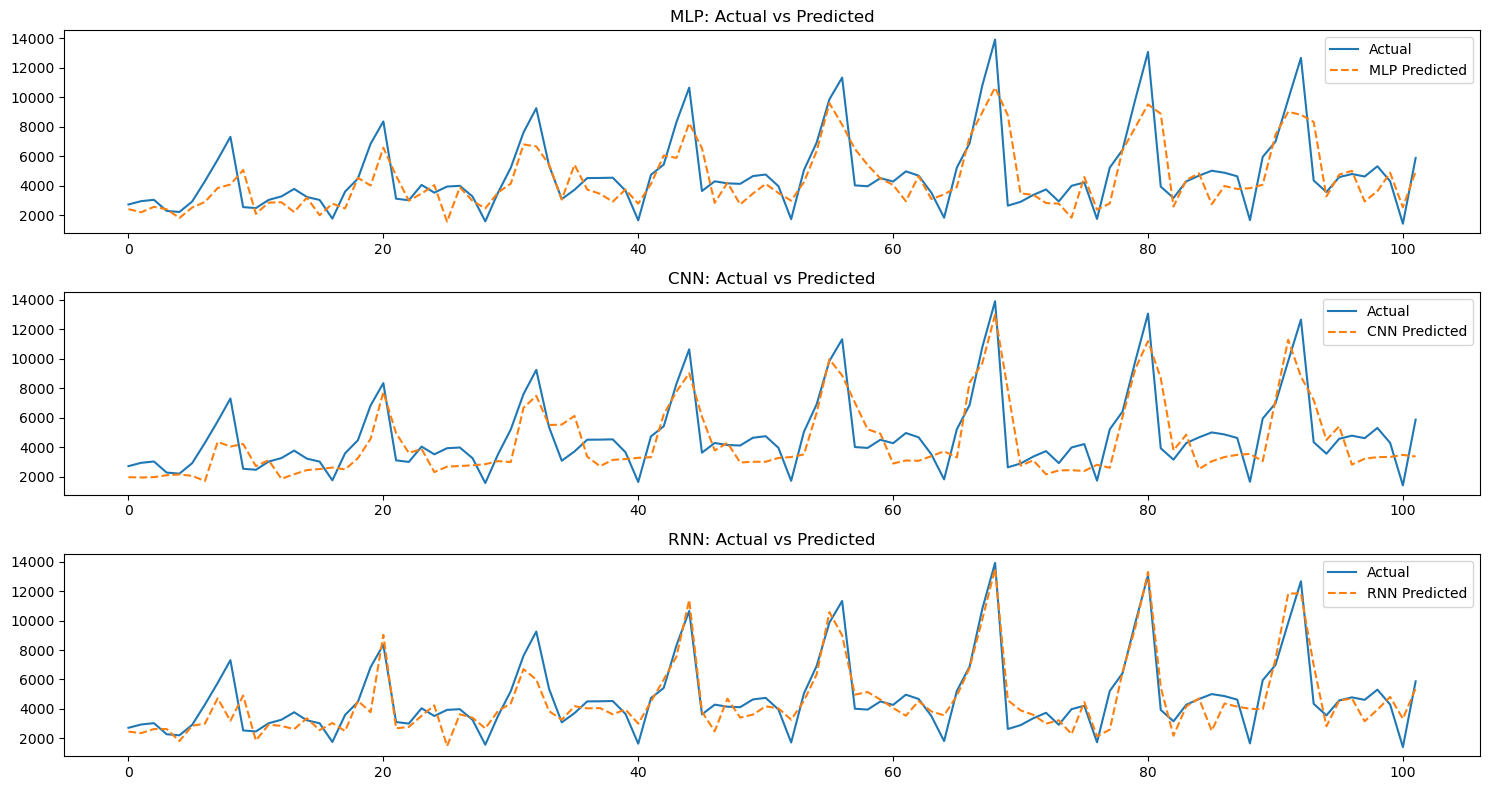

In [18]:
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(y, label='Actual')
plt.plot(y_pred_mlp, label='MLP Predicted', linestyle='dashed')
plt.title('MLP: Actual vs Predicted')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(y, label='Actual')
plt.plot(y_pred_cnn, label='CNN Predicted', linestyle='dashed')
plt.title('CNN: Actual vs Predicted')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(y, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', linestyle='dashed')
plt.title('RNN: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

Based on the provided metrics, the RNN model appears to outperform both the MLP and CNN models in terms of MAE, RMSE, and R2 score, suggesting that it provides better predictions for the given time series data.